<a href="https://colab.research.google.com/github/Asertigi/moreEGE/blob/main/more_ege.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача 1

Лесник решил провести кластеризацию животных по их расположению в лесу. Он разделил карту на квадраты по километровым отметкам: первый квадрат можно описать 0 ≤ x ≤ 1, 0 ≤ y ≤ 1, второй — 1 ≤ x ≤ 2,0 ≤ y ≤ 1 и так далее.

Для файла А леснику нужно определить два соседних квадрата, в которых суммарно находится больше всего животных. Для файла Б леснику нужно определить три соседних квадрата. Квадраты называются соседними, если у них есть общая граница.

Для каждого файла вычислите два числа: S — количество социальных животных в выбранных соседних квадратах, и K — количество остальных животных в выбранных соседних квадратах. Животное называется социальным, если в радиусе 0.1 вокруг него находится как минимум 14 других животных.

В ответе запишите четыре числа: в первой строке S и K для файла А, во второй строке аналогичные данные для файла Б.

In [44]:
import matplotlib.pyplot as plt


def dist (x1, y1, x2, y2):
  return ((x1-x2)**2+(y1-y2)**2)**0.5

def solve(file, const):
  m = file.readlines()
  x = []
  y = []
  for line in m:
    x1, y1 = line.split('\t')
    x.append(float(x1))
    y.append(float(y1))

  a = [0]*len(x)
  b = [0]*(const**2)
  for i in range(len(x)):
    a[i] = int(x[i])+int(y[i])*const
    b[int(x[i])+int(y[i])*const] += 1

  i_best = 0
  j_best = 0
  s_best = 0

  for i in range(const**2):
    for j in range(i+1, const**2, 1):
      if (i//const==j//const) and abs(i-j)==1 and (b[i]+b[j]>s_best):
        s_best=b[i]+b[j]
        i_best = i
        j_best = j
      if (i%const==j%const) and abs(i-j)==const and (b[i]+b[j]>s_best):
        s_best=b[i]+b[j]
        i_best = i
        j_best = j

  social = []
  usual = []
  s = 0
  u = 0
  for i in range(len(x)):
    if (a[i] == i_best) or (a[i] == j_best):
      cnt = 0
      for j in range(len(x)):
        if (dist(x[i], y[i], x[j], y[j]) <= 0.1):
          cnt += 1
      if (cnt >= 15):
        social.append(i)
        s += 1
      else:
        u += 1
    if (len(social)!=0)and(social[len(social)-1] != i):
      usual.append(i)

  for i in range(len(social)):
    plt.plot(x[social[i]], y[social[i]], 'ro')
  for i in range(len(usual)):
    plt.plot(x[usual[i]], y[usual[i]], 'b1')

  print(s, u)
  plt.show()

104 453


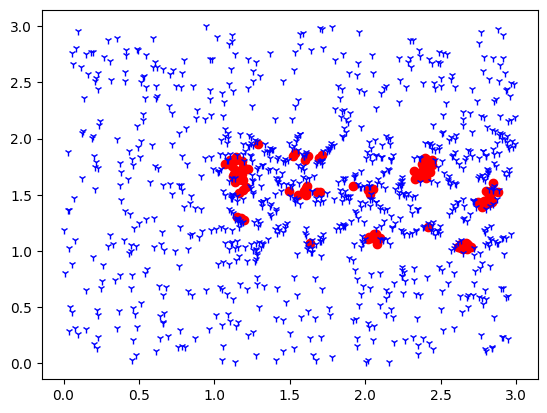

In [46]:
solve(open('1_A.txt'), 3)

1441 111


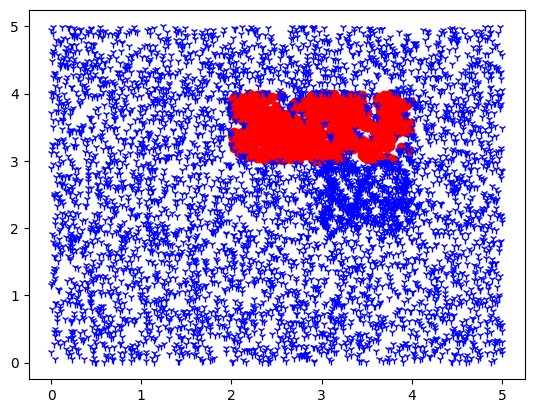

In [48]:
solve(open('1_B.txt'), 5)

## Задача 2

Научно﻿-﻿исследовательский институт проводит мониторинг экологического состояния различных регионов. Результаты измерений представляются в виде пары чисел: первое — концентрация загрязняющего вещества в почве, второе — концентрация того же вещества в близлежащем водоёме. Для анализа результатов эта пара рассматривается как координаты точки на плоскости, и строится график с точками, которые соответствуют всем измерениям.

По ошибке данные нескольких исследуемых регионов были записаны в один файл. Известно, что измерения относятся к одному региону, если они образуют компактные группы точек на графике. Каждая группа лежит внутри прямоугольника высотой H и шириной.

Перед проведением основного анализа необходимо очистить данные от случайных выбросов при измерении. Для этого используется метод межквартильного размаха:
* для каждой группы точек вычисляется первый квартиль Q1 (значение, ниже которого находится 25% измерений) и третий квартиль Q3 (значение, выше которого находится 25% измерений) отдельно для рядов значений концентрации загрязняющего вещества в почве и в близлежащем водоёме (координаты X и Y)
* вычисляется межквартильный размах IQR - Q3 - Q1 для каждой кординаты
* точка считается выбросом, если хотя бы одна из её координат Х или Y выходит за пределы диапазона |Q1 - 1.5 * IQR; Q3 + 1.5 * IQR|

Для каждого региона необходимо рассчитать индекс экологической опасности I, который определяется как отношение среднего значения измерений к их количеству после удаления выбросов.

Под средним значением измерений в этом случае понимается среднее евклидово расстояние между всеми парами различных точек (измерений) в регионе.

В файле A хранятся данные о трёх регионах, где H=30, W=35. Каждая строка файла содержит два числа: координаты X (концентрация в почве) и Y (концентрация в водоёме), соответствующие одному измерению. Значения даны в условных единицах. Известно, что количество измерений не превышает 1000.

В файле B хранятся данные о пяти регионах, где H=40, W=32. Известно, что количество измерений не превышает 10000. Структура хранения информации в файле B аналогична файлу А.

Для каждого файла определите:
* общее количество выявленных выбросов
* регион с максимальным индексом экологической опасности

В ответе запишите четыре числа: в первой строке — общее количество выбросов и целую часть произведения I×100000 для файла A, во второй строке — аналогичные данные для файла B.

Расчёт квартилей
* Найдите медиану значений данных. Это второй квартиль Q2
* Найдите медиану значений данных, которые находятся ниже второго квартиля. Это первый квартиль Q1
* Найдите медиану значений данных, которые выше второго квартиля. Это третий квартиль Q3

## Задача 3

Кластеризуйте как в предыдущих домашках. Будем называть центром кластера точку этого кластера, сумма расстояний от которой до всех остальных точек кластера минимальна.

Для каждого файла определите координаты центра каждого кластера, затем вычислите два числа: A - среднее арифметическое абсцисс центров кластеров, и среднее B - арифметическое ординат центров кластеров. В ответе запишите четыре числа: в первой строке сначала целую часть произведения A\*10000 затем целую часть произведения B\*10000 для файла А, во второй строке — аналогичные данные для файла Б.


## Задача 4

Исследователь анализирует набор объектов, каждый из которых характеризуется пятью числовыми параметрами. Он знает, что объекты образуют несколько групп (кластеров), которые можно выявить при проекции на плоскость только двух параметров из пяти. Значения в одном из столбцов будут соответствовать координатам по оси абсцисс, а из второго — координатам по оси ординат. Каждый кластер можно заключить в квадратную область заданного размера L, причём эти квадраты между собой не пересекаются. Стороны квадратов параллельны координатным осям. Каждый объект должен принадлежать только одному кластеру.

Евклидово расстояние

В файле A хранятся данные о наборе объектов, образующих три кластера. В каждой строке через пробел записаны пять параметров, характеризующих один объект. Все значения представлены с точностью до двух знаков после запятой. Количество объектов в файле А не превышает 1000.

В файле Б записаны данные о наборе объектов, образующих шесть кластеров, с аналогичной структурой хранения информации. Количество объектов в файле Б не превышает 10000.

Для каждого файла необходимо определить, какая пара параметров позволяет разделить объекты на кластеры, и найти минимальный размер стороны квадрата L, который может содержать все точки одного кластера при проекции на плоскость найденных параметров. Также определите в каждом кластере расстояние между двумя объектами, расположенными дальше всего друг от друга, и вычислите P — среднее арифметическое таких расстояний для всех кластеров.

В ответе запишите четыре числа: в первой строке — целую часть произведения L×10000, затем целую часть произведения P×10000 для файла А, во второй строке — аналогичные значения для файла Б.

In [ ]:
## Задача 5